In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 계층적 군집분석

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

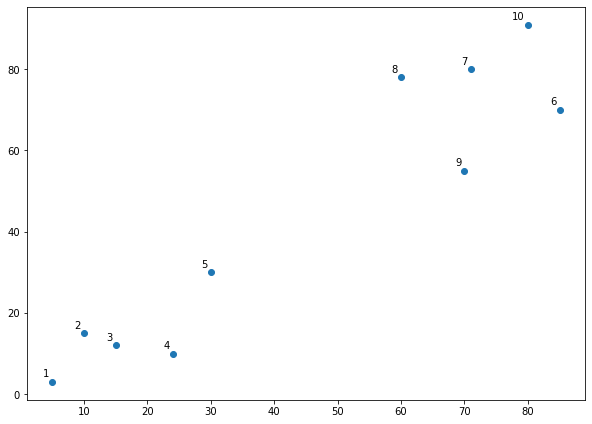

In [5]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0], X[:, 1], label='True Position')

for label, x, y in zip(labels, X[:,0], X[:,1]):
    plt.annotate(
        label,
        xy = (x,y), xytext=(-3,3),
        textcoords = 'offset points',ha='right',va='bottom'
    )
plt.show()

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

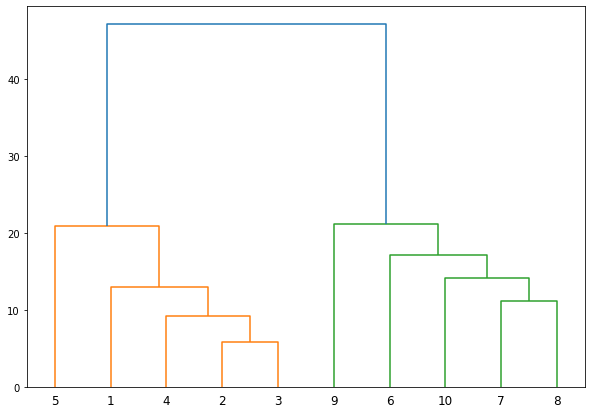

In [8]:
labelList = range(1,11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
          orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)
plt.show()

In [12]:
customer_data= pd.read_csv('./data/shopping-data.csv')

In [13]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data = customer_data.iloc[:, 3:5].values

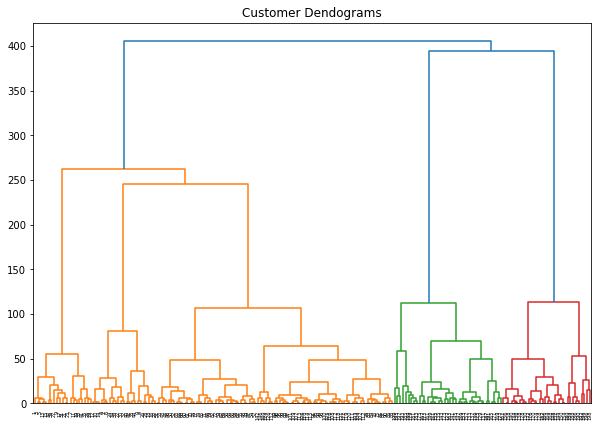

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

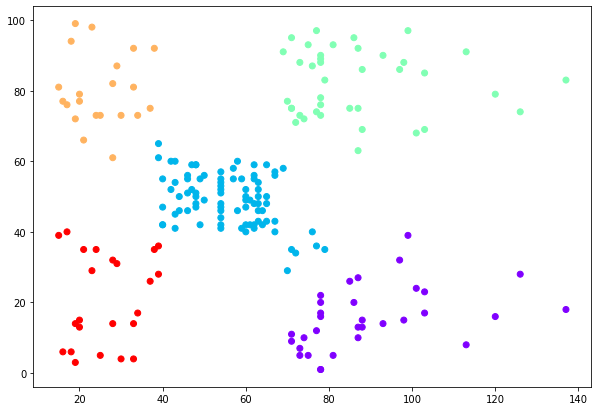

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_, cmap='rainbow')

## Boston House 집값 데이터

In [18]:
# 데이터 불러오기
data = pd.read_csv("./data/Boston_house.csv") 

'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

data.head() # 데이터 확인

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [19]:
target = data['Target']
data = data.drop(['Target'],axis=1)

In [20]:
data.shape

(506, 13)

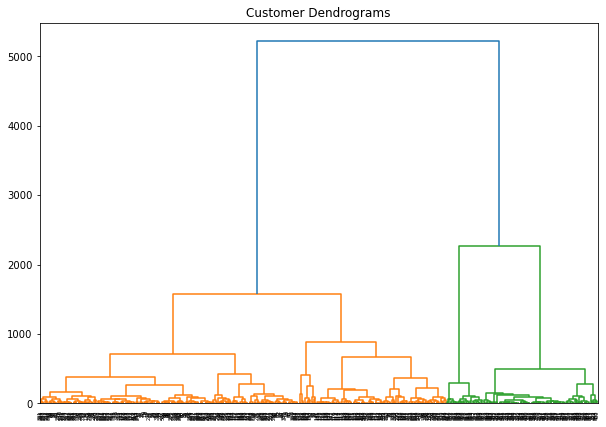

In [21]:
plt.figure(figsize=(10,7))
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(data,method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
np.mean([x for x ,y in zip(target, cluster.fit_predict(data)) if y == 0])

16.272262773722627

In [25]:
np.mean([x for x,y in zip(target, cluster.fit_predict(data)) if y == 1])

24.857181571815715

In [26]:
data.iloc[cluster.fit_predict(data) == 0, :].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000
mean,89.967883,291.039051,6.006212,12.299162,2.05447,18.451825,18.674526,0.670102,20.196350,23.270073,0.0,667.642336,0.058394
std,12.469840,144.089867,0.713021,13.017296,0.60790,1.814342,6.873577,0.061051,0.018821,3.764196,0.0,8.469441,0.235348
min,40.300000,0.320000,3.561000,0.105740,1.12960,18.100000,2.960000,0.532000,20.100000,4.000000,0.0,666.000000,0.000000
25%,86.100000,210.970000,5.683000,5.441140,1.58950,18.100000,14.190000,0.614000,20.200000,24.000000,0.0,666.000000,0.000000
50%,94.500000,374.560000,6.152000,8.716750,1.92650,18.100000,18.050000,0.693000,20.200000,24.000000,0.0,666.000000,0.000000
75%,98.800000,395.280000,6.411000,14.236200,2.36820,18.100000,23.240000,0.713000,20.200000,24.000000,0.0,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,4.09830,27.740000,37.970000,0.770000,20.200000,24.000000,0.0,711.000000,1.000000


In [27]:
data.iloc[cluster.fit_predict(data)==1,:].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,60.632249,381.042575,6.388005,0.388774,4.441272,8.420894,10.417453,0.511847,17.809214,4.455285,15.582656,311.926829,0.073171
std,28.217681,39.567014,0.670817,0.628724,2.097985,6.004356,5.831720,0.101241,2.210135,1.643095,26.086641,67.828288,0.260770
min,2.900000,70.800000,4.903000,0.006320,1.321600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,35.900000,383.780000,5.933000,0.057890,2.714700,4.000000,6.120000,0.437000,16.400000,4.000000,0.000000,270.000000,0.000000
50%,62.200000,392.780000,6.245000,0.131580,4.052200,6.410000,9.380000,0.493000,17.900000,4.000000,0.000000,304.000000,0.000000
75%,88.000000,396.330000,6.727000,0.369200,5.873600,10.010000,13.280000,0.544000,19.200000,5.000000,22.000000,384.000000,0.000000
max,100.000000,396.900000,8.725000,4.097400,12.126500,25.650000,34.410000,0.871000,22.000000,8.000000,100.000000,469.000000,1.000000
